In [1]:
import pandas as pd
import numpy as np

In [2]:
from transformers import BertTokenizer, TFBertModel

In [3]:
df = pd.read_csv('newsdf.csv')

In [4]:
df.head()

,Unnamed: 0,organizations,uuid,thread,author,url,ord_in_thread,title,locations,entities,highlightText,language,persons,text,external_links,published,crawled,highlightTitle
0,0,[],4e41266ca1707a052245161948413f057982c0b2,"{'social': {'gplus': {'shares': 0}, 'pinterest...",Reuters Editorial,https://www.reuters.com/article/brief-au-optro...,0,BRIEF-AU Optronics to pay cash dividend of T$1...,[],"{'persons': [], 'locations': [], 'organization...",NaN,english,[],March 27(Reuters) - AU Optronics Corp :\n* Say...,"['https://twitter.com/reuters', 'https://www.y...",2018-03-27T22:14:00.000+03:00,2018-03-28T19:06:23.016+03:00,NaN
1,1,[],14baef3b7ccb2247669c395093f8080e607696cf,"{'social': {'gplus': {'shares': 0}, 'pinterest...",NaN,https://uk.reuters.com/article/uk-britain-econ...,0,British stats watchdog - stop using RPI inflat...,[],"{'persons': [{'name': 'david n', 'sentiment': ...",NaN,english,[],"March 8, 2018 / 1:35 PM / Updated an hour ago ...",[],2018-03-08T15:42:00.000+02:00,2018-03-08T16:14:31.004+02:00,NaN
2,2,[],5265614c8ca52231a35f9008ee5e4313938eb25c,"{'social': {'gplus': {'shares': 0}, 'pinterest...",NaN,https://in.reuters.com/video/2018/03/23/dropbo...,0,Dropbox shares surge in IPO,[],"{'persons': [{'name': 'fred katayama', 'sentim...",NaN,english,[],"Dropbox shares surge in IPO Saturday, March 24...",[],2018-03-23T22:23:00.000+03:00,2018-03-24T23:09:50.059+03:00,NaN
3,3,[],8c7842ac387ba659fdcf396582c5041922225324,"{'social': {'gplus': {'shares': 0}, 'pinterest...",Reuters Editorial,https://www.reuters.com/article/us-germany-naz...,0,Bookkeeper of Auschwitz dies before starting s...,[],"{'persons': [{'name': 'oskar groening', 'senti...",NaN,english,[],BERLIN (Reuters) - The man known as the “bookk...,['http://thomsonreuters.com/en/about-us/trust-...,2018-03-13T01:05:00.000+02:00,2018-03-12T20:52:17.008+02:00,NaN
4,4,[],b58cb12cc6919413d80a00f9a38b4c22a7142411,"{'social': {'gplus': {'shares': 0}, 'pinterest...",Alexandra Gibbs,https://www.cnbc.com/2018/03/05/us-stock-futur...,0,US stocks set for a negative open as trade war...,[],"{'persons': [{'name': 'donald trump', 'sentime...",NaN,english,[],Dow closes 336 points higher as trade-war worr...,['https://twitter.com/realDonaldTrump/status/9...,2018-03-05T13:27:00.000+02:00,2018-03-05T12:38:30.000+02:00,NaN


In [8]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [16]:
texts = df['text'].sample(100)
texts = [i[:500] for i in texts]
texts_list = list(texts)
filtered_texts = []
for text in texts_list:
    if (isinstance(text, str)):
        filtered_texts.append(text)

In [17]:
all(isinstance(x, str) for x in filtered_texts)

True

In [18]:
bert_inputs = tokenizer(filtered_texts,
                  padding=True,
                  return_tensors='tf')

bert_inputs

{'input_ids': <tf.Tensor: shape=(100, 254), dtype=int32, numpy=
array([[  101,  1364,  1512, ...,     0,     0,     0],
       [  101, 26574,  2162, ...,     0,     0,     0],
       [  101, 26660, 13329, ...,     0,     0,     0],
       ...,
       [  101,  1318,  1476, ...,     0,     0,     0],
       [  101,  1318,   124, ...,     0,     0,     0],
       [  101, 11336,  7854, ...,     0,     0,     0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(100, 254), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(100, 254), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32

In [19]:
bert_layer = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [20]:
bert_outputs = bert_layer(bert_inputs)

#print('shape of first output: \t\t', bert_outputs[0].shape)
#print('shape of second output: \t', bert_outputs[1].shape)

In [42]:
df[df['text']]

,Unnamed: 0,organizations,uuid,thread,author,url,ord_in_thread,title,locations,entities,highlightText,language,persons,text,external_links,published,crawled,highlightTitle


In [43]:
lens = [i.split() for i in df['text'] if (type(i) == str) ]

In [ ]:
import matplotlib.pyplot as plt

False

In [45]:
the_lens = [len(i) for i in lens]

(array([2.6861e+05, 2.6984e+04, 3.2890e+03, 1.9380e+03, 1.5050e+03,
        1.1890e+03, 8.7600e+02, 6.3300e+02, 3.9900e+02, 2.7000e+02,
        1.8200e+02, 1.1700e+02, 6.0000e+01, 5.5000e+01, 2.8000e+01,
        2.4000e+01, 1.6000e+01, 1.0000e+01, 1.0000e+01, 8.0000e+00,
        7.0000e+00, 5.0000e+00, 1.4000e+01, 2.0000e+00, 1.0000e+00,
        5.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0.  ,   704.36,  1408.72,  2113.08,  2817.44,  3521.8 ,
         4226.16,  4930.52,  5634.88,  6339.24,  7043.6 ,  7747.96,
         8452.32,  9156.68,  9861.04, 10565.4 , 11269.76, 11974.12,
        12678.48, 13382.84, 14087.2 , 14791.56, 15495.92, 16200.28,
        16904.64, 17609.  , 18313.36, 19017.72

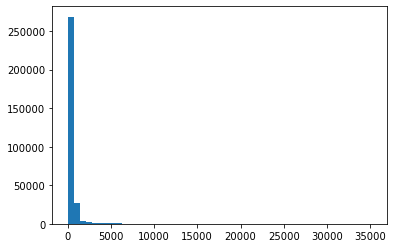

In [49]:
plt.hist(the_lens,bins=50)

In [50]:
max(the_lens)

35218

In [51]:
min(the_lens)

0

In [53]:
np.mean(the_lens)

401.8875591445953

(0.0, 5000.0, 0.0, 500000.0)

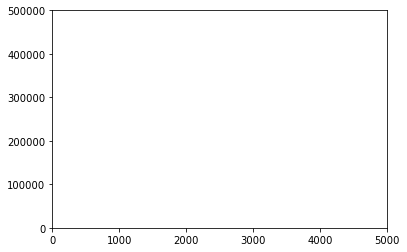

In [57]:
plt.axis([0, 5000, 0, 500000])

(array([3.02326e+05, 3.36700e+03, 4.42000e+02, 6.80000e+01, 2.90000e+01,
        8.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0. ,  3521.8,  7043.6, 10565.4, 14087.2, 17609. , 21130.8,
        24652.6, 28174.4, 31696.2, 35218. ]),
 <BarContainer object of 10 artists>)

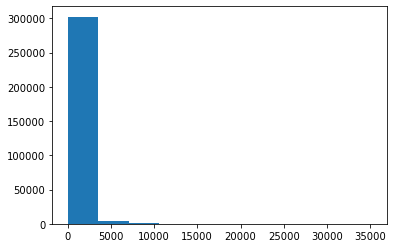

In [58]:
plt.hist(the_lens)

In [64]:
l = np.array(the_lens)

(array([255179.,  37754.,   4808.,   1996.,   1531.,   1204.,    990.,
           784.,    569.,    438.]),
 array([   0. ,  599.9, 1199.8, 1799.7, 2399.6, 2999.5, 3599.4, 4199.3,
        4799.2, 5399.1, 5999. ]),
 <BarContainer object of 10 artists>)

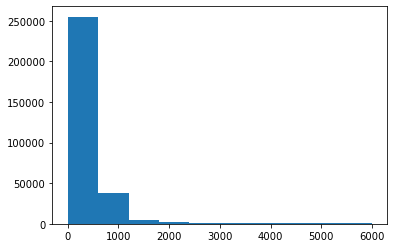

In [77]:
plt.hist(l[l<6000])

In [71]:
sum(l>15000)

31

In [72]:
sum(l>10000)

122

In [73]:
sum(l>5000)

1782

In [74]:
len(l)

306241